## Bibliotecas

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from statsmodels.iolib.summary2 import summary_col

import warnings
warnings.filterwarnings('ignore')

## Introdu√ß√£o

O objetivo deste estudo foi analisar as vari√°veis macroecon√¥micas que est√£o relacionadas ao n√∫mero de ofertas p√∫blicas (IPO + Fallow-On) no Brasil, o termo IPO significa a 'initial public offering' que trata-se da primeira vez que um empresa coloca a√ß√µes em negocia√ß√£o no mercado e Fallow-On √© uma oferta subsequente onde mais a√ß√µes s√£o colocadas no mercado. Foi feito uma an√°lise de regress√£o para dados de contagem visto que estamos analisando o n√∫mero de ofertas p√∫blicas (vari√°vel discreta) em fun√ß√£o de uma s√©rie de vari√°veis macroecon√¥micas, trabalhei inicialmente com o modelo Poisson e depois o Binomial Negativo devido a poss√≠vel diagn√≥stico de superdispers√£o, no final comparei ambos os resultados e a relev√¢ncia das vari√°veis para explicar o fen√¥meno estudado.

### Por que as empresas abrem capital?

Segundo o artigo 'Abertura de capital no Brasil: percep√ß√µes de executivos financeiros' dos autores H. Steffen e F. Zanini h√° duas teorias candidatas a explicar o que leva uma companhia a abrir capital, uma dela seria a Teoria do Ciclo de Vida que diz respeito ao est√°gio de vida da companhia, por exemplo, est√°gio de alto crescimento, e o de Teoria de market timing que diz respeito a "janelas de oportunidade" que seriam momentos ideias para as empresas abrirem capital e maximizarem o valor captado. Neste estudo, busquei analisar se vari√°veis macroecon√¥micas podem explicar o n√∫mero de ofertas p√∫blicas (IPO + Fallow-On) ocorridos em um ano, portanto testando a teoria que as empresas buscam abrir o seu capital em momentos oportunos (market timing) como de taxas de juros mais baixas ou economia mais aquecida. 

Visto que a companhia busca maximizar o valor captado na oferta p√∫blica √© preciso entender o que constitu√≠ este valor, um modelo muito utilizado √© o de fluxo de caixa descontado (DCF) que pode ser expresso como: 

$$
PV = \frac {CF_1}{(1+r)^1} + \frac {CF_2}{(1+r)^2} + ... + \frac {CF_n}{(1+r)^n}
$$

A leitura √© que o valor presente de uma companhia depende dos seus fluxos de caixa (CF) trazidas a valor presente por uma taxa de desconto (r), os fluxos de caixa dependem de uma s√©rie de fatores como o crescimento do n√∫mero de vendas, margens operacionais e gest√£o de capital de giro, j√° a taxa de desconto depende da taxa livre de risco e o risco espec√≠fico associado a companhia. Portanto, √© razo√°vel supor que como a companhia quer maximizar o volume captado e o investidor por sua vez precisa estar confiante de que a firma vai performar bem.

## Base de Dados

A base de dados foi obtida a partir do Ipeadata e organizada em uma planilha do excel que compreende o per√≠odo de 2004 √† 2023, j√° os dados do Ibovespa foram extra√≠dos do yahoo finance e tratados por meio do Pandas. Na primeira coluna temos o n√∫mero de IPOs e nas seguintes colunas temos as seguintes vari√°veis:

- SELIC: Taxa Selic Meta (a.a) (%) (fim do per√≠odo): Principal taxa de juros do Brasil, espera-se uma rela√ß√£o negativa visto tornar menos atrativo investir em equity em rela√ß√£o a t√≠tulos livre de risco. 
$$
$$
- PIB: Varia√ß√£o real do PIB (a.a) (%) (fim do per√≠odo): √â a soma de todos os bens e servi√ßos finais produzidos no pa√≠s em um dado per√≠odo, espera-se uma rela√ß√£o positiva visto que uma economia aquecida est√° associada a proje√ß√µes de crescimento mais favor√°veis para as companhias.
$$
$$
- USDBRL: Varia√ß√£o da taxa de c√¢mbio (a.a) (%) (fim do per√≠odo): √â o pre√ßo da moeda do d√≥lar medido em reais, taxa extra√≠da √© de compra no c√¢mbio comercial, espera-se uma rela√ß√£o negativa visto que o c√¢mbio reage a cen√°rios de maior incerteza (Dilma II, Joesley Day, Pandemia etc.) e tamb√©m √© um risco cambial para o investidor estrangeiro. 
$$
$$
- EMBI: √çndice EMBI+ Brasil (%) (fim do per√≠odo): EMBI significa 'Emerging Markets Bond Index Plus' e mede o diferencial de juros dos t√≠tulos brasileiros em rela√ß√£o aos norte-americanos, espera-se uma rela√ß√£o negativa por ser um proxy de risco. 
$$
$$
- IBOVESPA: Volatilidade √çndice Ibovespa (a.a) (%) (M√©dia): Volatilidade m√©dia di√°ria do √≠ndice Ibovespa, momentos de maior incerteza estaria associada a maior volatilidade e que seria esperado um menor n√∫mero de ofertas p√∫blicas visto incerteza das companhias quanto ao potencial de capta√ß√£o. 
$$
$$
- COVID: √â uma vari√°vel dummy que foi adicionada para capturar o momento  

Obs. Todas as vari√°veis foram colocadas em base logaritimica. 

In [605]:
df = pd.read_excel(r'C:\Users\emanu\OneDrive\√Årea de Trabalho\IPO.xlsx')
df = df.set_index('Ano')
df

IPO  SELIC   PIB   USDBRL  EMBI  IBOVESPA  COVID
Ano                                                   
2004   15  17.75  5.76 -14.5392  3.82    1.7288      0
2005   19  18.00  3.20 -16.5692  3.11    1.5465      0
2006   42  13.25  3.96 -11.3758  1.92    1.4691      0
2007   76  11.25  6.07 -20.7264  2.21    1.6493      0
2008   12  13.75  5.09  24.6205  4.28    2.8868      0
2009   24   8.75 -0.13 -28.6697  1.92    1.9534      0
2010   22  10.75  7.53  -9.6820  1.89    1.2466      0
2011   22  11.00  3.97   5.8470  2.23    1.4368      0
2012   12   7.25  1.92   2.7773  1.42    1.3423      0
2013   17  10.00  3.01   8.4058  2.24    1.2580      0
2014    2  11.75  0.50   6.1953  2.59    1.4695      0
2015    5  14.25 -3.55  32.8104  5.23    1.4750      0
2016   10  13.75 -3.28 -21.1265  3.28    1.6087      0
2017   26   7.00  1.32  -1.3613  2.40    1.1496      0
2018    5   6.50  1.78  12.8884  2.76    1.3381      0
2019   42   4.50  1.22  -0.2163  2.14    1.1321      0
2020   53   2.00 -3.28  23.3308  2.60    2.2003      1
2021   72   9.25  4.76  -2.5718  3.26    1.2978      1
2022   19  13.75  3.02 -11.6100  2.56    1.5789      0
2023   22  11.75  2.91 -11.2638  1.95    1.0805      0

### Transforma√ß√£o Base Log

In [606]:
df.iloc[:,1:5] = np.log(df.iloc[:,1:5]/100+1)
df

IPO     SELIC       PIB    USDBRL      EMBI  IBOVESPA  COVID
Ano                                                               
2004   15  0.163394  0.056002 -0.157112  0.037488    1.7288      0
2005   19  0.165514  0.031499 -0.181153  0.030626    1.5465      0
2006   42  0.124428  0.038836 -0.120765  0.019018    1.4691      0
2007   76  0.106610  0.058929 -0.232265  0.021859    1.6493      0
2008   12  0.128833  0.049647  0.220103  0.041909    2.8868      0
2009   24  0.083881 -0.001301 -0.337849  0.019018    1.9534      0
2010   22  0.102105  0.072600 -0.101833  0.018724    1.2466      0
2011   22  0.104360  0.038932  0.056824  0.022055    1.4368      0
2012   12  0.069992  0.019018  0.027394  0.014100    1.3423      0
2013   17  0.095310  0.029656  0.080711  0.022153    1.2580      0
2014    2  0.111094  0.004988  0.060110  0.025570    1.4695      0
2015    5  0.133219 -0.036145  0.283752  0.050978    1.4750      0
2016   10  0.128833 -0.033350 -0.237325  0.032274    1.6087      0
2017   26  0.067659  0.013114 -0.013707  0.023717    1.1496      0
2018    5  0.062975  0.017643  0.121230  0.027226    1.3381      0
2019   42  0.044017  0.012126 -0.002165  0.021174    1.1321      0
2020   53  0.019803 -0.033350  0.209700  0.025668    2.2003      1
2021   72  0.088469  0.046502 -0.026054  0.032080    1.2978      1
2022   19  0.128833  0.029753 -0.123411  0.025278    1.5789      0
2023   22  0.111094  0.028685 -0.119502  0.019312    1.0805      0

In [607]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 2004 to 2023
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IPO       20 non-null     int64  
 1   SELIC     20 non-null     float64
 2   PIB       20 non-null     float64
 3   USDBRL    20 non-null     float64
 4   EMBI      20 non-null     float64
 5   IBOVESPA  20 non-null     float64
 6   COVID     20 non-null     int64  
dtypes: float64(5), int64(2)
memory usage: 1.2 KB


In [608]:
df.describe()

IPO      SELIC        PIB     USDBRL       EMBI   IBOVESPA  \
count  20.00000  20.000000  20.000000  20.000000  20.000000  20.000000   
mean   25.85000   0.102021   0.022189  -0.029666   0.026511   1.542405   
std    20.91908   0.037017   0.030619   0.165654   0.008934   0.418861   
min     2.00000   0.019803  -0.036145  -0.337849   0.014100   1.080500   
25%    12.00000   0.080409   0.010342  -0.131837   0.020709   1.287850   
50%    20.50000   0.105485   0.029170  -0.019880   0.024497   1.469300   
75%    30.00000   0.128833   0.040825   0.065260   0.030990   1.618850   
max    76.00000   0.165514   0.072600   0.283752   0.050978   2.886800   

           COVID  
count  20.000000  
mean    0.100000  
std     0.307794  
min     0.000000  
25%     0.000000  
50%     0.000000  
75%     0.000000  
max     1.000000

### Distribui√ß√£o do N√∫mero de IPOs

Abaixo gerei um gr√°fico da nossa vari√°vel dependente que √© o n√∫mero de IPOs por ano, infelizmente temos poucas observa√ß√µes e podemos visualizar que a distribui√ß√£o tem uma cauda gorda que j√° √© um ind√≠cio que talvez n√£o siga uma distribui√ß√£o Poisson.  

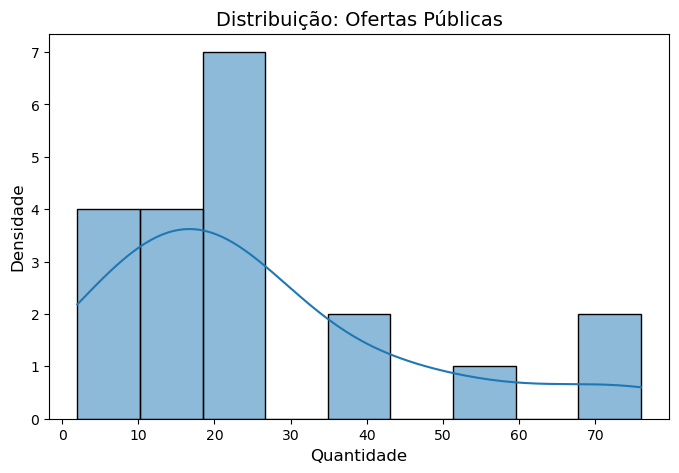

In [646]:
plt.figure(figsize=(8, 5))

sns.histplot(df['IPO'], bins = 9, kde=True)

plt.title('Distribui√ß√£o: Ofertas P√∫blicas', fontsize=14)

plt.xlabel('Quantidade', fontsize=12)
plt.ylabel('Densidade', fontsize=12)

plt.show()

### Gr√°fico: Desempenho Hist√≥rico das Vari√°veis

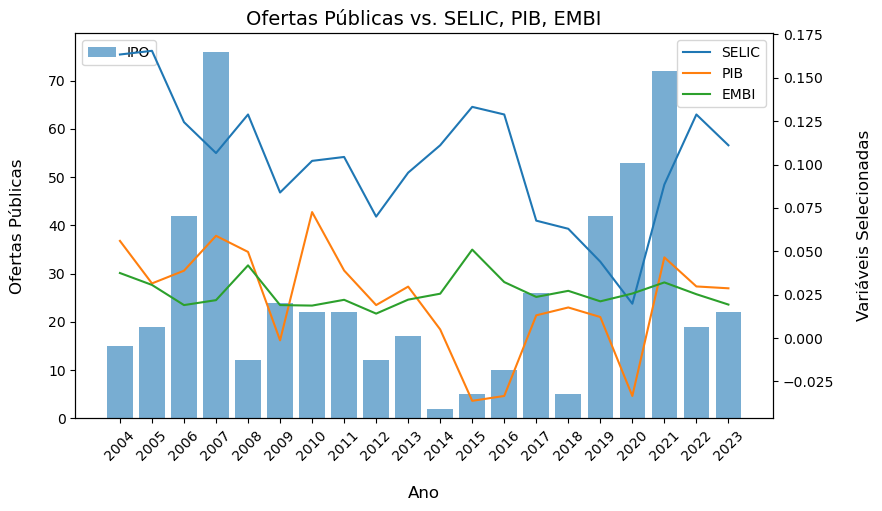

In [645]:
fig, ax1 = plt.subplots(figsize=(9,5))

plt.title('Ofertas P√∫blicas vs. SELIC, PIB, EMBI', fontsize = 14)

ax1.bar(df.index, df['IPO'], alpha=0.6, label = 'IPO')

ax2 = ax1.twinx()  

ax2.plot(df.index, (df[['SELIC', 'PIB', 'EMBI']]), 
         label=df[['SELIC', 'PIB', 'EMBI']].columns)

ax1.set_ylabel('Ofertas P√∫blicas\n', fontsize = 12)
ax2.set_ylabel('\nVari√°veis Selecionadas', fontsize = 12)

ax1.set_xlabel('\nAno', fontsize = 12)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xticks(np.arange(df.index[0], df.index[-1] + 1, 1))
ax1.set_xticklabels(np.arange(df.index[0], df.index[-1] + 1, 1), rotation=45)

plt.show()

### Box Plot

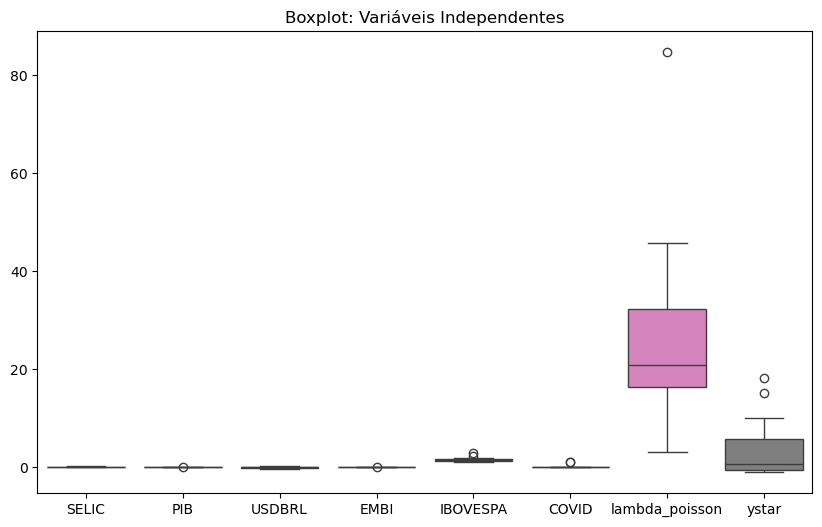

In [648]:
plt.figure(figsize=(10, 6))
sns.boxplot(df.iloc[:,1:])
plt.title('Boxplot: Vari√°veis Independentes')
plt.show()

### Heatmap

Abaixo podemos visualizar a correla√ß√£o das nossas vari√°veis, a correla√ß√£o com o n√∫mero de IPOs seguiu o que seria previsto: h√° uma correla√ß√£o positiva (+) e negativa (-) com SELIC, USDBRL e EMBI.

<Axes: >

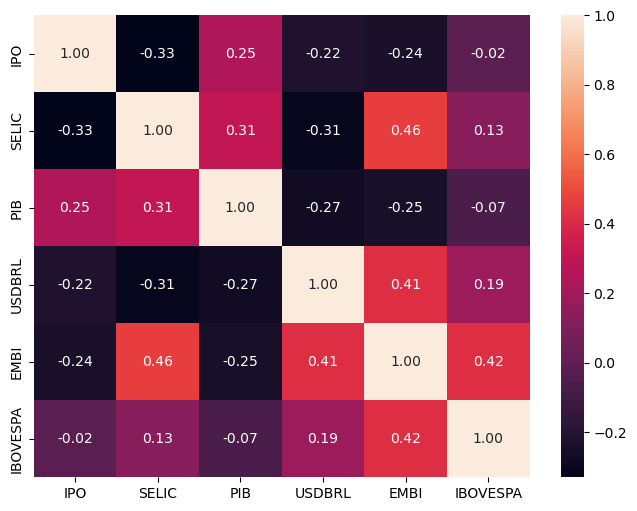

In [657]:
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:,:6].corr(), annot=True, fmt=".2f", annot_kws={'size': 10})

## Modelo de Regress√£o Poisson

Os modelos de regress√£o poisson s√£o utilizados quando a vari√°vel dependente √© discreta assumindo valores naturais e positivos, por exemplo, o n√∫mero de camisetas no invent√°rio de uma loja. Como o pr√≥prio nome sugere, esta vari√°vel segue uma distribui√ß√£o poisson no seguinte formato: 

$$ P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!} $$

onde:

- $ \lambda $ √© o par√¢metro de taxa (m√©dia de ocorr√™ncias),
- $ k $ √© o n√∫mero de ocorr√™ncias,
- $ e $ √© o n√∫mero de Euler,
- $ k! $ √© o fatorial de $ k $.

Podemos modelar a fun√ß√£o do nosso par√¢metro de interesse $ \lambda $ como sendo igual a:

$$
\ln(\lambda) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n
$$

ou

$$
\lambda = e^{(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n)}
$$

A estima√ß√£o do modelo √© feito por m√°xima verossimilhan√ßa (*maximum likelihood*), como o pr√≥prio nome sugere este m√©todo busca encontrar os par√¢metros ($\beta$) que maximizem a probabilidade (*likelihood*) de obter a amostra observada. No caso, como trata-se de dados que seguem uma distribui√ß√£o poisson podemos representar uma fun√ß√£o de verossimilhan√ßa como:
 
$$
L = \prod_{i=1}^{n} \frac{\lambda^k e^{-\lambda}}{k!}
$$

O problema de optimiza√ß√£o √© maximizar a fun√ß√£o *log-likelihood* que √© o logar√≠tmo natural da fun√ß√£o de verossimilhan√ßa. 

$$
LL = \sum_{i=1}^{n} \left( - \lambda_i + Y_i \ln(\lambda_i)  - \ln(Y_i!) \right)
$$

A deriva√ß√£o detalhada pode ser encontrada no livro Manual de An√°lise de Dados do Favero. 

In [658]:
# Vari√°veis independentes
df.columns[1:]

Index(['SELIC', 'PIB', 'USDBRL', 'EMBI', 'IBOVESPA', 'COVID', 'lambda_poisson',
       'ystar'],
      dtype='object')

In [706]:
# Modelo com todas as vari√°veis 
modelo = smf.glm(formula='IPO ~ SELIC + PIB + USDBRL + EMBI + IBOVESPA + COVID',
                 data=df,
                 family=sm.families.Poisson()).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    IPO   No. Observations:                   20
Model:                            GLM   Df Residuals:                       13
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -92.462
Date:                Sat, 26 Oct 2024   Deviance:                       89.505
Time:                        10:21:51   Pearson chi2:                     85.0
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4735      0.247     14.070      0.000       2.990       3.957
SELIC        -10.3736      2.593     -4.001      0.000     -15.455      -5.292
PIB           12.5334      2.027      6.184      0.000       8.561      16.506
USDBRL        -2.4176      0.397     -6.092      0.000      -3.195      -1.640
EMBI          -9.4065     11.362     -0.828      0.408     -31.675      12.862
IBOVESPA       0.2627      0.132      1.988      0.047       0.004       0.522
COVID          1.1361      0.160      7.082      0.000       0.822       1.450
==============================================================================
"""

In [707]:
# Modelo com vari√°veis estatisticamente significativas
modelo = smf.glm(formula='IPO ~ SELIC + PIB + USDBRL + COVID',
                 data=df,
                 family=sm.families.Poisson()).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    IPO   No. Observations:                   20
Model:                            GLM   Df Residuals:                       15
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -94.473
Date:                Sat, 26 Oct 2024   Deviance:                       93.528
Time:                        10:21:54   Pearson chi2:                     89.5
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7501      0.157     23.821      0.000       3.442       4.059
SELIC        -11.1502      1.760     -6.335      0.000     -14.600      -7.700
PIB           11.3636      1.793      6.336      0.000       7.849      14.879
USDBRL        -2.5519      0.357     -7.157      0.000      -3.251      -1.853
COVID          1.0808      0.118      9.138      0.000       0.849       1.313
==============================================================================
"""

## Superdispers√£o

Uma das hip√≥teses da distribui√ß√£o Poisson √© que a vari√¢ncia e a m√©dia s√£o iguais, isso √© uma hip√≥tese importante a ser testada pois caso violado o nosso modelo pode acabar gerando par√¢metros viesados (mesmo que sejam estatisticamente significativos), esse problema √© chamado de superdispers√£o. Como vemos abaixo, a nossa amostra de dados indica a exist√™ncia de superdispers√£o. Segundo Favero, um m√©todo desenvolvido por Cameron e Trivedi √© rodar uma regress√£o entre os valores previstos (fitted values) pelo modelo poisson estimado e pelo Y* que √© calculado segundo a f√≥rmula abaixo: 

$${Y_i}^* = \frac{[(Y_i - \lambda_i)^2 - Y_i]}{\lambda_i}$$ 

Rodar a regress√£o e verificar se o $\beta$ √© superior a 5%, caso seja h√° equidispers√£o, caso contr√°rio h√° superdispers√£o. 

$$\hat{Y_i}^* = \beta . \lambda_i$$

In [625]:
df['lambda_poisson'] = modelo.fittedvalues

df['ystar'] = (((df['IPO'] - df['lambda_poisson'])**2) - df['IPO']) / df['lambda_poisson']

modelo_auxiliar = sm.OLS.from_formula('ystar ~ 0 + lambda_poisson', df).fit()

modelo_auxiliar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  ystar   R-squared (uncentered):                   0.311
Model:                            OLS   Adj. R-squared (uncentered):              0.275
Method:                 Least Squares   F-statistic:                              8.588
Date:                Sat, 26 Oct 2024   Prob (F-statistic):                     0.00858
Time:                        09:22:47   Log-Likelihood:                         -62.106
No. Observations:                  20   AIC:                                      126.2
Df Residuals:                      19   BIC:                                      127.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
lambda_poisson     0.1165      0.040      2.931      0.009       0.033       0.200
==============================================================================
Omnibus:                        5.534   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                3.580
Skew:                           1.012   Prob(JB):                        0.167
Kurtosis:                       3.446   Cond. No.                         1.00
==============================================================================

Notes:
[1] R¬≤ is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [626]:
# Validando com a fun√ß√£o overdisp
from statstests.tests import overdisp

overdisp(modelo, df)

Estimating model...: 
 GLM
                       Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.275   
Dependent Variable:     ystar            AIC:                         126.2120
Date:                   2024-10-26 09:22 BIC:                         127.2078
No. Observations:       20               Log-Likelihood:              -62.106 
Df Model:               1                F-statistic:                 8.588   
Df Residuals:           19               Prob (F-statistic):          0.00858 
R-squared (uncentered): 0.311            Scale:                       30.693  
-----------------------------------------------------------------------------------
               Coef.       Std.Err.        t         P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
lmbda          0.1165        0.0398      2.9305      0.0086      0.0333      0.1998
-----------------------------

## Modelo Binomial Negativo (Poisson Gama)

Indicado quando h√° ind√≠cio de superdispers√£o, segue uma distribui√ß√£o Poisson-Gama que apresenta uma dispers√£o maior do que a binomial. 

$$ P(X = k) = \frac{\delta^\psi . v_i^{\psi-1} e^{-v_i . \delta}}{\Gamma (\psi)} $$

Onde: 

- $\delta$ = Par√¢metro de forma
- $\psi$ = Par√¢metro de decaimento (taxa)

Um par√¢metro importante √© o $\phi$ que √© igual a $\frac{1}{\delta}$, este $\phi$ ser√° utilizado no modelo do statamodels como o par√¢metro (alpha = i). O objetivo √© encontrar o $\phi$ que maximize o log-likelihood do modelo, ou seja, estamos diante de um problema de optimiza√ß√£o e uma solu√ß√£o √© rodar v√°rias modelos com diferentes $\phi$. 

In [666]:
alphas = np.linspace(0.01, 10, 100)

# log-likelihood
llf = []

# Loop que calcula o llf para cada valor de alpha no modelo
for i in alphas: 
    model = smf.glm(formula='IPO ~ SELIC + PIB + USDBRL + COVID',
                    data=df,
                    family=sm.families.NegativeBinomial(alpha=i)).fit()
    llf.append(model.llf)

In [667]:
phi = pd.DataFrame()

phi['llf'] = llf
phi['alphas'] = alphas

phi

llf     alphas
0   -86.530228   0.010000
1   -73.403922   0.110909
2   -73.295834   0.211818
3   -74.303695   0.312727
4   -75.497387   0.413636
..         ...        ...
95 -109.729300   9.596364
96 -109.894719   9.697273
97 -110.058685   9.798182
98 -110.221224   9.899091
99 -110.382362  10.000000

[100 rows x 2 columns]

In [668]:
# phi associado
phi_otimo = phi['alphas'].iloc[np.nanargmax(phi['llf'])]
phi_otimo

0.21181818181818182

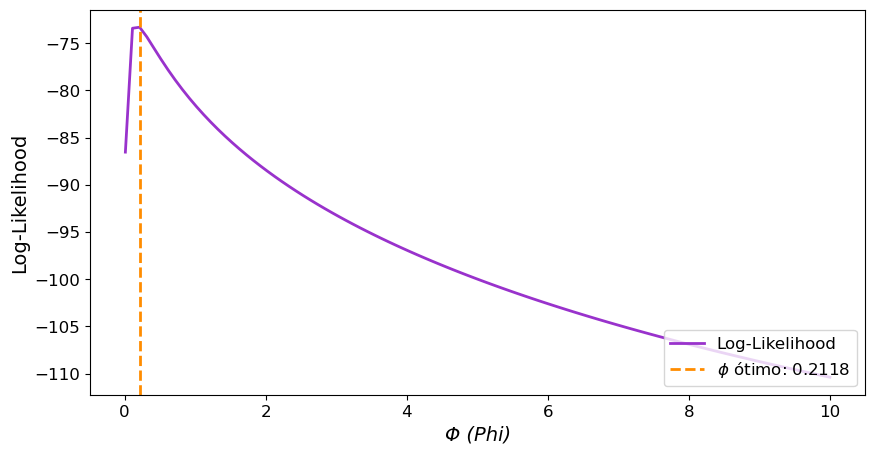

In [669]:
plt.figure(figsize=(10, 5))

plt.plot(phi['alphas'], phi['llf'], label='Log-Likelihood', color='darkorchid', linewidth = 2)

plt.axvline(x=phi_otimo, color='darkorange', linewidth = 2, linestyle='dashed',
            label=f'$\phi$ √≥timo: {round(phi_otimo, 4)}')

plt.xlabel('Œ¶ (Phi)', fontsize=14, style='italic')
plt.ylabel('Log-Likelihood', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='lower right', fontsize=12)

plt.show()

### Modelo Binomial Negativo - Final

Rodamos o modelo com o "phi" √≥timo e todas as vari√°veis continuaram sendo estatisticamente significativas, como pode-se ver ele tamb√©m teve um log-likelihood menor do que o modelo Poisson feito anteriormente. 

In [632]:
modelo_bneg = smf.glm(formula='IPO ~ SELIC + PIB + USDBRL + COVID',
                      data=df,
                      family=sm.families.NegativeBinomial(alpha=phi_otimo)).fit()

modelo_bneg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    IPO   No. Observations:                   20
Model:                            GLM   Df Residuals:                       15
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -73.296
Date:                Sat, 26 Oct 2024   Deviance:                       17.390
Time:                        09:23:00   Pearson chi2:                     14.5
No. Iterations:                     7   Pseudo R-squ. (CS):             0.7932
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5576      0.401      8.872      0.000       2.772       4.344
SELIC         -9.5834      3.905     -2.454      0.014     -17.237      -1.929
PIB           11.9203      4.356      2.737      0.006       3.383      20.458
USDBRL        -2.4483      0.822     -2.980      0.003      -4.059      -0.838
COVID          1.2619      0.407      3.102      0.002       0.464       2.059
==============================================================================
"""

## Compara√ß√£o Poisson e Binomial Negativo

Abaixo temos um comparativo de ambos os modelos, podemos ver que os par√¢metros (ùõΩ) das fun√ß√µes de regress√£o mudaram e no modelo Poisson-Gama tivemos um log-likelihood (LL) menor.

In [703]:
summary_col([modelo, modelo_bneg], 
            model_names=["Poisson","BNeg"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
            })

<class 'statsmodels.iolib.summary2.Summary'>
"""

================================
            Poisson      BNeg   
--------------------------------
Intercept 3.4244***   3.5576*** 
          (0.2359)    (0.4010)  
SELIC     -11.8920*** -9.5834** 
          (1.8236)    (3.9052)  
PIB       12.8498***  11.9203***
          (1.9751)    (4.3560)  
USDBRL    -2.5818***  -2.4483***
          (0.3432)    (0.8217)  
IBOVESPA  0.2351*               
          (0.1262)              
COVID     1.0506***   1.2619*** 
          (0.1210)    (0.4068)  
N         20          20        
Log-lik   -92.81      -73.30    
================================
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
"""

### Teste $\chi^2$

Para verificar se a diferen√ßa dos LL dos modelos s√£o estatisticamente diferentes, fazemos o teste de ùúí2 calculando o Likelihood Ratio (LR) e rodando no teste "chi" dispon√≠vel na biblioteca statsmodels. Obtemos um p-valor baix√≠ssimo e rejeitamos a hip√≥tese nula que os modelos produzem LL estatisticamente iguais. 

In [670]:
llk_p = modelo.llf
llk_bneg = modelo_bneg.llf

LR_statistic = -2*(llk_p-llk_bneg)
p_val = stats.chi2.sf(LR_statistic, 1)

print('Likelihood Ratio (LR):', LR_statistic)
print('p-valor:', p_val)

Likelihood Ratio (LR): 42.35428099547008
p-valor: 7.614946900215659e-11


## Valores Estimados e Observados

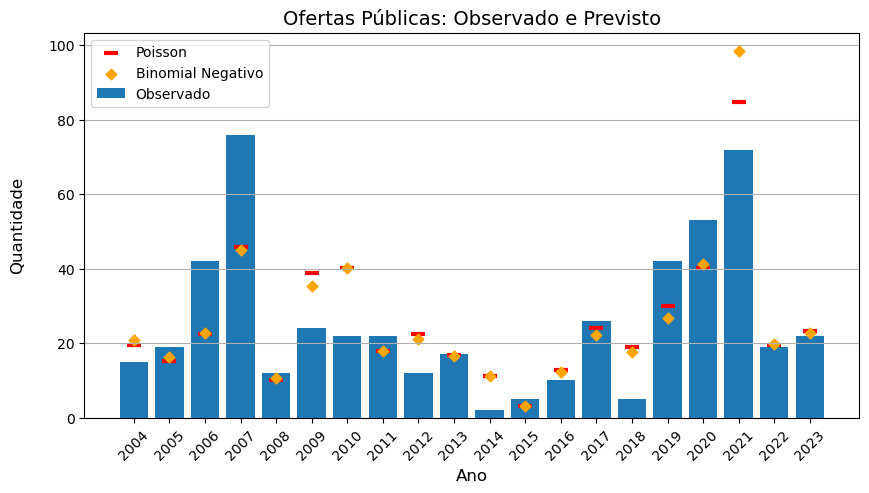

In [716]:
y = df['IPO']
y_poisson = modelo.fittedvalues
y_bneg = modelo_bneg.fittedvalues

plt.figure(figsize=(10,5))

plt.title('Ofertas P√∫blicas: Observado e Previsto', fontsize=14)

plt.bar(df.index, y, label = 'Observado')
plt.scatter(df.index, y_poisson, label = 'Poisson', color = 'red', marker='_', s= 100, linewidths=3)
plt.scatter(df.index, y_bneg, label = 'Binomial Negativo', color = 'orange', marker='D', s= 30, linewidths=1)

plt.xticks(np.arange(df.index[0], df.index[-1] + 1, 1), rotation=45)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade\n', fontsize=12)

plt.legend()

plt.grid(axis='y')
plt.show()

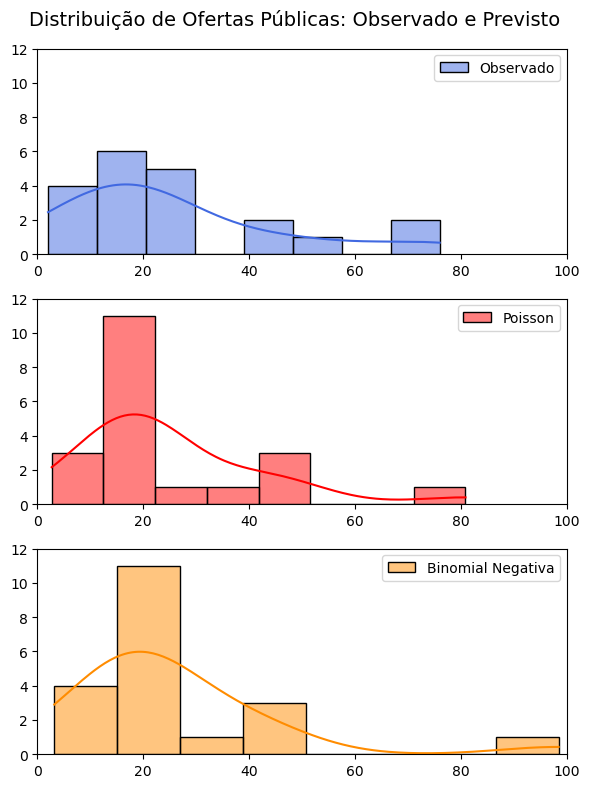

In [713]:
dic = {'Observado': df['IPO'],
         'Poisson': y_poisson,
         'Binomial Negativa': y_bneg}

cores = ['royalblue', 'red', 'darkorange']

plt.figure(figsize=(6,8))
    
plt.suptitle('Distribui√ß√£o de Ofertas P√∫blicas: Observado e Previsto', fontsize=14)

for i, (nome, dados) in enumerate(dic.items(), start=1):
    
    plt.subplot(3, 1, i)
    
    sns.histplot(dados, bins=8, kde=True, label=nome, color=cores[i-1])
    
    plt.ylabel('', fontsize=12)
    plt.xlabel('', fontsize=12)
    
    plt.xlim(0, 100)
    plt.ylim(0, 12)
    
    plt.legend()
    
plt.tight_layout(rect=[0, 0, 1, 1])